## Avaliando datasets modificados pelo bert_tokenizer (sem oov)
##### Configurações

- bert base neuralmind, com log_softmax, z_score e exp(z_score)
- todos os tokens do dataset têm tamanho 1
- tamanho corpus (para comparação): 15M, 30M, 60M, 120M, 240M
- 15M N=570 True=275
- 30M N=573 True=276
- 60M N=574 True=276
- 120M N=574 True=276
- 240M N=574 True=276

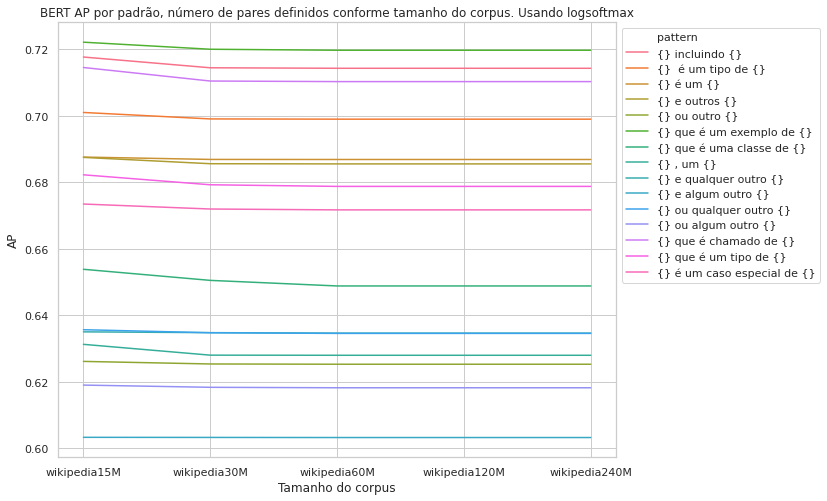

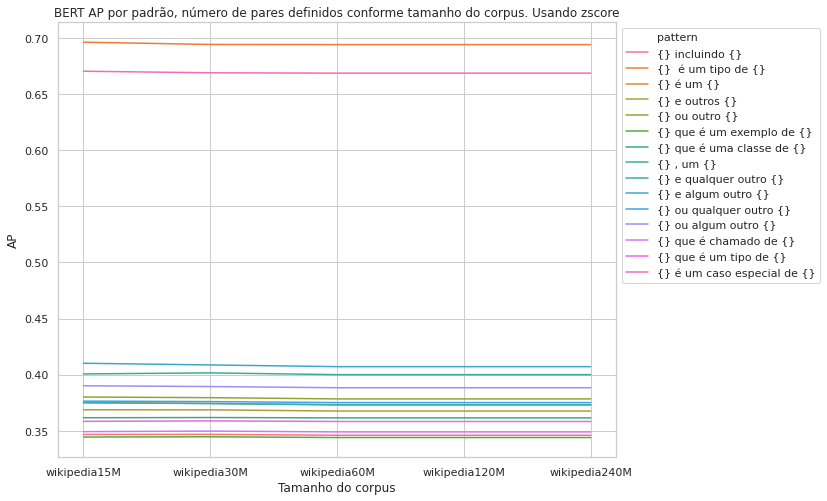

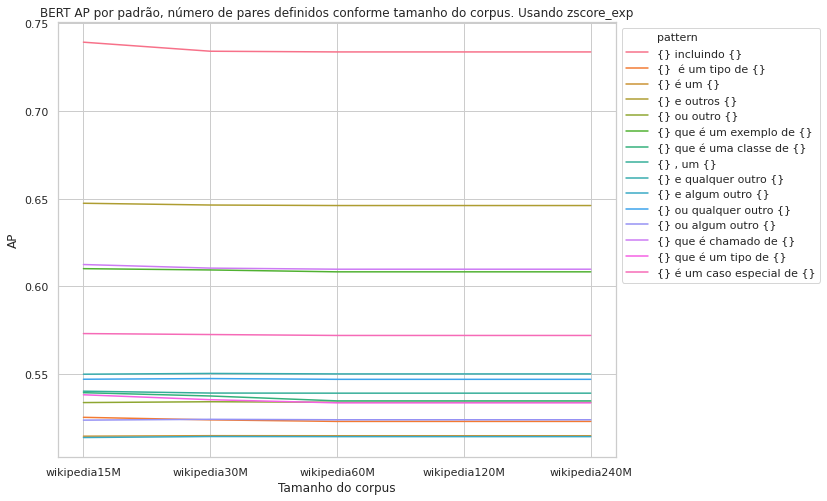

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="bright")

path = ["../results/neuralmind-bert-base-portuguese-cased_logsoftmax_by-pattern/result.tsv",
        "../results/neuralmind-bert-base-portuguese-cased_zscore_by-pattern/result.tsv",
        "../results/neuralmind-bert-base-portuguese-cased_zscore_exp_by-pattern/result.tsv"]

for p in path:
    score = p.split("/")[2][38:-11]
    df = pd.read_csv(p, delimiter="\t")
    df = df[(df['method'] == "all_subword") & (df['corpus'] != "bert")]
    df['size_corpus'] = pd.to_numeric(df['corpus'].str[9:-1])
    df = df.sort_values(by="size_corpus", ascending=True)
    plt.figure(figsize=(10,8))
    ax = sns.lineplot(x="corpus", y="AP", hue="pattern", ci="sd", sort=False, data=df)
    ax.legend(bbox_to_anchor=(1, 1))
    ax.set(xlabel="Tamanho do corpus")
    ax.set_title(f"BERT AP por padrão, número de pares definidos conforme tamanho do corpus. Usando {score}")
    plt.show()
